# TP1 K-NN

## Importation des library nécessaires

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

## Importation du jeu de données

In [2]:
mnist = fetch_openml('mnist_784') 

In [3]:
#print(mnist.data[0])

In [4]:
# Affichage des labels en cas d'apprentissage supervisé
print(mnist.target)

['5' '0' '4' ... '4' '5' '6']


In [5]:
len(mnist.data)

70000

In [6]:
print(mnist.data.shape)

(70000, 784)


## Affichage d'une image

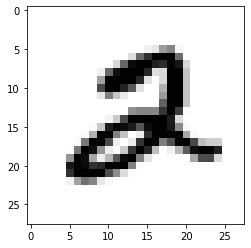

2


In [7]:
images = mnist.data.reshape((-1, 28, 28))
plt.imshow(images[5],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show() 
print(mnist.target[5]) # Affichage du label

## Utilisation de l'algo de K-NN

In [8]:
from sklearn import neighbors, model_selection

In [9]:
import numpy as np

In [10]:
data = np.random.randint(70000,size=5000)

In [11]:
xtrain, xtest, ytrain, ytest =  model_selection.train_test_split(mnist.data[data], mnist.target[data],train_size=0.8)

### Creation du classifieur

In [29]:
clf = neighbors.KNeighborsClassifier(10)

### Apprentissage

In [30]:
 clf.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

### Test de prédiction en utilisant le quatrième élément du set de test

In [14]:
print("valeur prédite : ",clf.predict(xtest[4].reshape(1,-1)))
print("valeur réelle : ",ytest[4])

valeur prédite :  ['8']
valeur réelle :  8


In [15]:
print("probabilités : ",clf.predict_proba(xtest[4].reshape(1,-1)))

probabilités :  [[0.  0.  0.  0.4 0.  0.  0.  0.  0.6 0. ]]


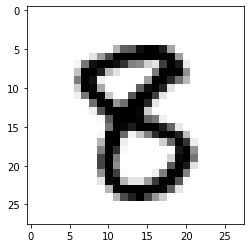

In [16]:
images = xtest.reshape((-1, 28, 28))
plt.imshow(images[4],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show() 

### Autre test, non valide cette fois ci

valeur prédite :  ['7']
valeur réelle :  7
probabilités :  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Image correspondante : 


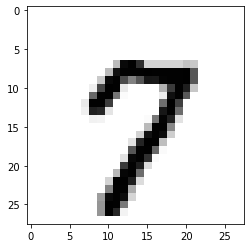

In [17]:
print("valeur prédite : ",clf.predict(xtest[5].reshape(1,-1)))
print("valeur réelle : ",ytest[5])
print("probabilités : ",clf.predict_proba(xtest[5].reshape(1,-1)))
images = xtest.reshape((-1, 28, 28))
plt.imshow(images[5],cmap=plt.cm.gray_r,interpolation="nearest")
print("Image correspondante : ")
plt.show()

### Score global du classifieur

In [31]:
clf.score(xtest, ytest)
# score sur le jeu de test
clf.score(xtrain, ytrain)

0.943

Ce chiffre est normal, avec 5000 images seulement et des ecritures différentes entre les personnes, l'algorithme ne parvient pas à reconnaitre toutes les images

### Test avec des k différents

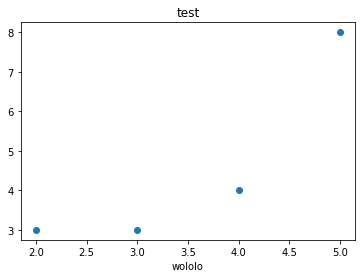

[33, 55]

In [19]:
plt.plot(range(2,6),[3,3,4,8],'o')
plt.xlabel("wololo")
plt.title("test")
plt.show()
from operator import add,truediv
liste = [x / 10 for x in [5,6]]
liste[1]
list(map(add,[12,23],[21,32]))

0.923
0.936
0.924
0.932
0.932
0.925
0.927
0.921
0.918
0.917
0.913
0.915
0.913
0.91
0.923
0.936
0.924
0.932
0.932
0.925
0.927
0.921
0.918
0.917
0.913
0.915
0.913
0.91
0.923
0.936
0.924
0.932
0.932
0.925
0.927
0.921
0.918
0.917
0.913
0.915
0.913
0.91
0.923
0.936
0.924
0.932
0.932
0.925
0.927
0.921
0.918
0.917
0.913
0.915
0.913
0.91
0.923
0.936
0.924
0.932
0.932
0.925
0.927
0.921
0.918
0.917
0.913
0.915
0.913
0.91
[0.923, 0.9360000000000002, 0.924, 0.932, 0.932, 0.925, 0.9269999999999999, 0.921, 0.9179999999999999, 0.917, 0.913, 0.915, 0.913, 0.9099999999999999]


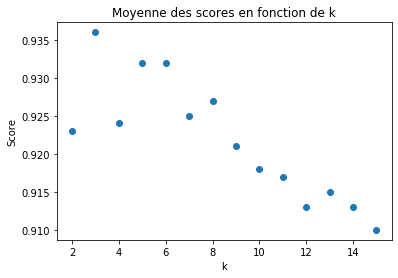

In [20]:
liste_finale = [0]*14
for i in range (1,6):
    temp = []
    for k in range(2,16):
        clf = neighbors.KNeighborsClassifier(k,n_jobs=-1)
        clf.fit(xtrain, ytrain)
        a = clf.score(xtest, ytest)
        temp.append(a)
        print(a)
    liste_finale = list(map(add,liste_finale,temp))
liste_finale = [x/5 for x in liste_finale]
print(liste_finale)
plt.plot(range(2,16),liste_finale,'o')
plt.xlabel("k")
plt.ylabel("Score")
plt.title("Moyenne des scores en fonction de k")
plt.show()

On remarque que les meilleurs scores sont pour k = 3 ou 5,6<br>

In [21]:
#On cache les warnings pour ne pas avoir un affichage trop long
import warnings
warnings.filterwarnings('ignore')

### Changement du pourcentage train/test (et k = 7)

0.8997142857142857
0.9006153846153846
0.911
0.9170909090909091
0.9196
0.9195555555555556
0.9245
0.9234285714285714
0.9266666666666666
0.9328
0.934
0.9333333333333333
0.964
0.96
0.898
0.9030769230769231
0.9126666666666666
0.9207272727272727
0.9204
0.9173333333333333
0.922
0.9234285714285714
0.932
0.9392
0.927
0.9293333333333333
0.934
0.924
0.9045714285714286
0.9092307692307692
0.9073333333333333
0.92
0.9104
0.924
0.9265
0.924
0.9313333333333333
0.9248
0.924
0.9373333333333334
0.928
0.916
0.9062857142857143
0.9153846153846154
0.908
0.9189090909090909
0.9224
0.9191111111111111
0.93
0.92
0.9293333333333333
0.92
0.927
0.9493333333333334
0.928
0.92
0.9011428571428571
0.9107692307692308
0.9096666666666666
0.9116363636363637
0.9228
0.9155555555555556
0.917
0.932
0.9373333333333334
0.936
0.93
0.924
0.952
0.94
[0.9019428571428569, 0.9078153846153846, 0.9097333333333333, 0.9176727272727272, 0.91912, 0.9191111111111111, 0.924, 0.9245714285714286, 0.9313333333333332, 0.93056, 0.9284000000000001, 0.

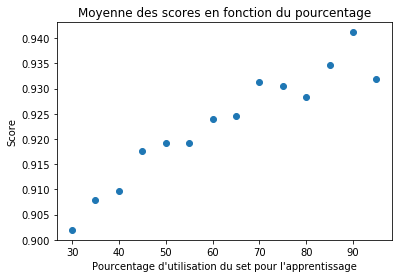

In [22]:
liste_finale = [0]*14
for i in range (1,6):
    temp = []
    for k in range(30,100,5):
        xtrain, xtest, ytrain, ytest =  model_selection.train_test_split(mnist.data[data], mnist.target[data],train_size=k/100)
        clf = neighbors.KNeighborsClassifier(5,n_jobs=-1)
        clf.fit(xtrain, ytrain)
        a = clf.score(xtest, ytest)
        temp.append(a)
        print(a)
    liste_finale = list(map(add,liste_finale,temp))
liste_finale = [x/5 for x in liste_finale]
print(liste_finale)
plt.plot(range(30,100,5),liste_finale,'o')
plt.xlabel("Pourcentage d'utilisation du set pour l'apprentissage")
plt.ylabel("Score")
plt.title("Moyenne des scores en fonction du pourcentage")
plt.show()


On remarque que plus le pourcentage est grand plus le score est bon. Cela est expliqué par le fait que plus le pourcentage est grand et plus la taille du set de training est grande. Si l'algorithme peut s'entrainer sur plus de données alors il sera meilleur

### Changement du type de distance
Type 1 : Distance de Manhattan <br>
Type 2 : (default) Distance Euclidienne

In [23]:
 for p in range(1,8):
    xtrain, xtest, ytrain, ytest =  model_selection.train_test_split(mnist.data[data], mnist.target[data],train_size=0.9)
    clf = neighbors.KNeighborsClassifier(7,p=p)
    clf.fit(xtrain, ytrain)
    print("score avec le type de distance ",p," : ",clf.score(xtest, ytest))

score avec le type de distance  1  :  0.926
score avec le type de distance  2  :  0.942
score avec le type de distance  3  :  0.934
score avec le type de distance  4  :  0.922
score avec le type de distance  5  :  0.93
score avec le type de distance  6  :  0.932
score avec le type de distance  7  :  0.938


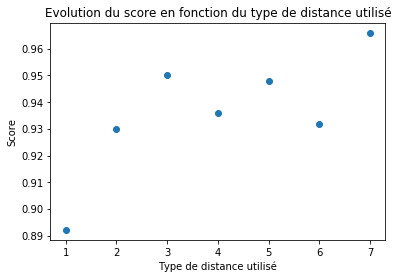

In [24]:
plt.plot(range(1,8),[0.892,0.93,0.95,0.936,0.948,0.932,0.966],'o')
plt.xlabel("Type de distance utilisé")
plt.ylabel("Score")
plt.title("Evolution du score en fonction du type de distance utilisé")
plt.show()

### Changement de n_job, fait varier l'utilisation du nombre de processeurs

In [25]:
import time

In [26]:
 for jobs in [-1,1]:
    temps1 = time.time()
    xtrain, xtest, ytrain, ytest =  model_selection.train_test_split(mnist.data[data], mnist.target[data],train_size=0.8)
    clf = neighbors.KNeighborsClassifier(7,n_jobs=jobs)
    clf.fit(xtrain, ytrain)
    clf.score(xtest, ytest)
    temps_final = time.time() - temps1
    print("temps d'execution avec jobs = ",jobs," : ",temps_final)

temps d'execution avec jobs =  -1  :  0.7408607006072998
temps d'execution avec jobs =  1  :  4.456697225570679


Changer le paramètre n_jobs ne change pas le temps d'apprentissage mais change le temps pour calculer le score. Dans la documentation il est marqué : "Doesn't affect fit method" <br>
Sur l'image si dessous on remarque un pic lors de l'utilisation de tous les processeurs puis un plateau correspondant au deuxième calcul avec un seul processeur.
![alt text](./capture_proco.png)

0.865
0.9025
0.9408333333333333
0.931875
0.9475
0.945
0.9528571428571428
0.954375
0.9491666666666667
0.9595
0.89
0.92375
0.9358333333333333
0.93625
0.9455
0.945
0.9464285714285714
0.9509375
0.9577777777777777
0.95375
0.9225
0.92625
0.935
0.939375
0.9485
0.9458333333333333
0.9507142857142857
0.9509375
0.9566666666666667
0.9655
0.9075
0.92125
0.9291666666666667
0.9525
0.944
0.9483333333333334
0.955
0.9490625
0.9575
0.95725
0.8925
0.915
0.9291666666666667
0.9375
0.9365
0.94625
0.9478571428571428
0.95625
0.9575
0.95175
[0.8955, 0.9177500000000001, 0.9339999999999999, 0.9395, 0.9443999999999999, 0.9460833333333334, 0.9505714285714285, 0.9523125, 0.9557222222222223, 0.95755]


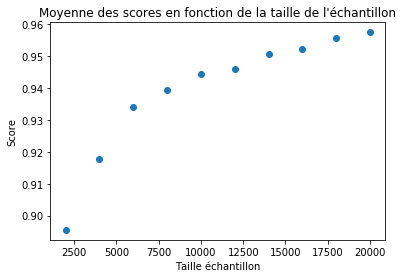

In [32]:
# Changement taille échantillon
liste_finale = [0]*10
for i in range (1,6):
    temp = []
    for j in range(2000,22000,2000):
        ran = np.random.randint(70000,size=j)
        xtrain, xtest, ytrain, ytest = model_selection.train_test_split(mnist.data[ran],mnist.target[ran],train_size=0.8)
        clf = neighbors.KNeighborsClassifier(5,n_jobs=-1)
        clf.fit(xtrain, ytrain)
        a = clf.score(xtest, ytest)
        temp.append(a)
        print(a)
    liste_finale = list(map(add,liste_finale,temp))
liste_finale = [x/5 for x in liste_finale]
print(liste_finale)
plt.plot(range(2000,22000,2000),liste_finale,'o')
plt.xlabel("Taille échantillon")
plt.ylabel("Score")
plt.title("Moyenne des scores en fonction de la taille de l'échantillon")
plt.show()
